667 1000 3


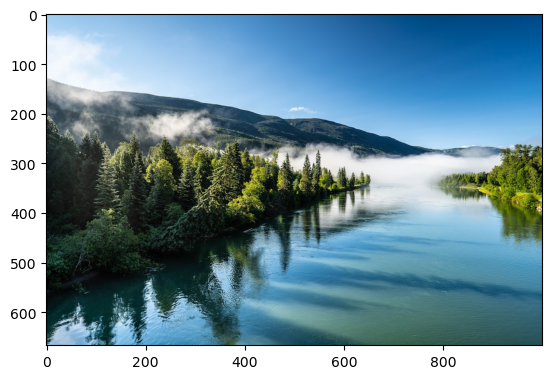

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

kmeans=KMeans(64,random_state=5)
file=r'D:\Downloads\photo-1596570630094-43ddbe073a77.jpeg'
img=plt.imread(file)
plt.imshow(img)
original=img
l,b,h=img.shape
print(l,b,h)


In [7]:
img=img.reshape(l*b,h)
img=np.array(img,dtype=np.float64)/255
sample=shuffle(img,random_state=5,n_samples=1500)
print(img.shape, sample.shape)

(667000, 3) (1500, 3)


In [8]:
kmeans.fit(sample)
labels=kmeans.predict(img)
col=kmeans.cluster_centers_
print(labels.shape,col.shape)

(667000,) (64, 3)


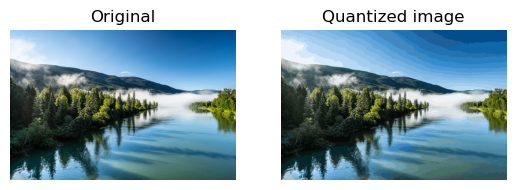

In [9]:
new_img=np.zeros((l,b,h))
ctr=0
for i in range(l):
    for j in range(b):
        new_img[i][j]=col[labels[ctr]]
        ctr+=1

plt.figure(1)
plt.subplot(221)
plt.title("Original")
plt.axis('off')
plt.imshow(original)
plt.subplot(222)
plt.title("Quantized image")
plt.axis('off')
plt.imshow(new_img)
plt.show()
